error 발생 포인트
1. ax = sns.barplot(df_mdd_10_modified.T, palette = palette)  [In62]

제안사항 : 위 시각자료를 제외할 시 문제 없으므로 제거 하는것 추천

In [1]:
# 모듈 importing
from pykrx import stock
import mplfinance as mpf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import talib
import squarify
from datetime import datetime
import warnings

# 경고 끄기
warnings.filterwarnings('ignore')

# 한글 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (20, 20) 

# 데이터 수집

In [2]:
# csv 파일 불러오기
df_sector_month = pd.read_csv('./섹터별_월별_20000101_20220901.csv',encoding='cp949').drop(columns='Unnamed: 0')
df_sector_year = pd.read_csv('./섹터별_연별_20000101_20220901.csv',encoding='cp949').drop(columns='Unnamed: 0')
df = pd.read_csv('./섹터별_20000101_20220901.csv', encoding='cp949').drop(columns='Unnamed: 0')
df_200 = pd.read_csv('./코스피200대분류별_20000101_20220901.csv', encoding = 'cp949').drop(columns='Unnamed: 0')

In [3]:
# 코스피 200 직접 불러오기
df_kospi_200 = stock.get_index_ohlcv("20181022", "20220901", "1028").reset_index()
temp = df_kospi_200.reset_index()
temp['sector_name'] = stock.get_index_ticker_name('1028')
temp['sector_ticker'] = '1028'
df_kospi_200 = temp[['sector_ticker','sector_name','날짜','시가','종가','고가','저가','거래량','거래대금',
                     '상장시가총액']]

# 칼럼명 영어로 변환
df_kospi_200.columns = ['sector_ticker','sector_name','date','open','close','high','low','volume','volume($)',
                     'Market_Cap']

# 데이터 전처리

In [4]:
# 날짜 타입 설정

df['date'] = df['date'].astype("datetime64")
df_200['date'] = df_200['date'].astype("datetime64")
df_kospi_200['date'] = df_kospi_200['date'].astype("datetime64")
df_sector_month['date'] = df_sector_month['date'].astype("datetime64")
df_sector_year['date'] = df_sector_year['date'].astype("datetime64")

In [5]:
# df 섹터별 구분하여 DF 생성

코스피 = df[df['sector_name']=='코스피']
음식료품 = df[df['sector_name']=='음식료품']
섬유의복 = df[df['sector_name']=='섬유의복']
종이목재 = df[df['sector_name']=='종이목재']
화학 = df[df['sector_name']=='화학']
의약품 = df[df['sector_name']=='의약품']
비금속광물 = df[df['sector_name']=='비금속광물']
철강금속 = df[df['sector_name']=='철강금속']
기계 = df[df['sector_name']=='기계']
전기전자 = df[df['sector_name']=='전기전자']
의료정밀 = df[df['sector_name']=='의료정밀']
운수장비 = df[df['sector_name']=='운수장비']
유통업 = df[df['sector_name']=='유통업']
전기가스업 = df[df['sector_name']=='전기가스업']
건설업 = df[df['sector_name']=='건설업']
운수창고업 = df[df['sector_name']=='운수창고업']
건설업 = df[df['sector_name']=='건설업']
통신업 = df[df['sector_name']=='통신업']
금융업 = df[df['sector_name']=='금융업']
은행 = df[df['sector_name']=='은행']
증권 = df[df['sector_name']=='증권']
보험 = df[df['sector_name']=='보험']
서비스업 = df[df['sector_name']=='서비스업']
제조업 = df[df['sector_name']=='제조업']

In [6]:
# 칼럼명 리스트 선언
sector_list=['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업']

x_list = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]

time_list = [df_sector_year,df_sector_month]

In [7]:
# df_200 섹터별 구분하여 DF 생성

커뮤니케이션서비스200 = df_200[df_200['sector_name']=='코스피 200 커뮤니케이션서비스']
건설200 = df_200[df_200['sector_name']=='코스피 200 건설']
중공업200 = df_200[df_200['sector_name']=='코스피 200 중공업']
철강소재200 = df_200[df_200['sector_name']=='코스피 200 철강/소재']
에너지화학200 = df_200[df_200['sector_name']=='코스피 200 에너지/화학']
정보기술200 = df_200[df_200['sector_name']=='코스피 200 정보기술']
금융200 = df_200[df_200['sector_name']=='코스피 200 금융']
생활소비재200 = df_200[df_200['sector_name']=='코스피 200 생활소비재']
경기소비재200 = df_200[df_200['sector_name']=='코스피 200 경기소비재']
산업재200 = df_200[df_200['sector_name']=='코스피 200 산업재']
헬스케어200 = df_200[df_200['sector_name']=='코스피 200 헬스케어']

In [8]:
# df_year, df_month 섹터별 구분하여 DF 생성
df_name_list=[]
for i in range(len(time_list)):
    for j in range(len(sector_list)):
        df_name_list.append(time_list[i][time_list[i]['sector_name']==sector_list[j]])
        
# 연도별 섹터별 분리
df_sector_year_코스피=df_name_list[0]
df_sector_year_음식료품=df_name_list[1] 
df_sector_year_섬유의복=df_name_list[2] 
df_sector_year_종이목재=df_name_list[3] 
df_sector_year_화학=df_name_list[4] 
df_sector_year_의약품=df_name_list[5] 
df_sector_year_비금속광물=df_name_list[6]
df_sector_year_철강금속=df_name_list[7] 
df_sector_year_기계=df_name_list[8] 
df_sector_year_전기전자=df_name_list[9] 
df_sector_year_의료정밀=df_name_list[10]
df_sector_year_운수장비=df_name_list[11] 
df_sector_year_유통업=df_name_list[12] 
df_sector_year_전기가스업=df_name_list[13] 
df_sector_year_건설업=df_name_list[14] 
df_sector_year_운수창고업=df_name_list[15] 
df_sector_year_통신업=df_name_list[16]
df_sector_year_금융업=df_name_list[17] 
df_sector_year_은행=df_name_list[18] 
df_sector_year_증권=df_name_list[19] 
df_sector_year_보험=df_name_list[20] 
df_sector_year_서비스업=df_name_list[21] 
df_sector_year_제조업=df_name_list[22]

# 월별 섹터별 분리
df_sector_month_코스피=df_name_list[23]
df_sector_month_음식료품=df_name_list[24]
df_sector_month_섬유의복=df_name_list[25]
df_sector_month_종이목재=df_name_list[26]
df_sector_month_화학=df_name_list[27] 
df_sector_month_의약품=df_name_list[28]
df_sector_month_비금속광물=df_name_list[29] 
df_sector_month_철강금속=df_name_list[30] 
df_sector_month_기계=df_name_list[31]
df_sector_month_전기전자=df_name_list[32]
df_sector_month_의료정밀=df_name_list[33] 
df_sector_month_운수장비=df_name_list[34]
df_sector_month_유통업=df_name_list[35] 
df_sector_month_전기가스업=df_name_list[36] 
df_sector_month_건설업=df_name_list[37] 
df_sector_month_운수창고업=df_name_list[38] 
df_sector_month_통신업=df_name_list[39] 
df_sector_month_금융업=df_name_list[40] 
df_sector_month_은행=df_name_list[41] 
df_sector_month_증권=df_name_list[42] 
df_sector_month_보험=df_name_list[43]
df_sector_month_서비스업=df_name_list[44] 
df_sector_month_제조업=df_name_list[45] 

In [9]:
# 연도별 index DF 선언
df_sector_year_코스피_index = (df_sector_year_코스피['Close'] / df_sector_year_코스피['Close'].iloc[0]) * 100
df_sector_year_음식료품_index = (df_sector_year_음식료품['Close'] / df_sector_year_음식료품['Close'].iloc[0]) * 100
df_sector_year_섬유의복_index = (df_sector_year_섬유의복['Close'] / df_sector_year_섬유의복['Close'].iloc[0]) * 100
df_sector_year_종이목재_index = (df_sector_year_종이목재['Close'] / df_sector_year_종이목재['Close'].iloc[0]) * 100
df_sector_year_화학_index = (df_sector_year_화학['Close'] / df_sector_year_화학['Close'].iloc[0]) * 100
df_sector_year_의약품_index = (df_sector_year_의약품['Close'] / df_sector_year_의약품['Close'].iloc[0]) * 100
df_sector_year_비금속광물_index = (df_sector_year_비금속광물['Close'] / df_sector_year_비금속광물['Close'].iloc[0]) * 100
df_sector_year_철강금속_index = (df_sector_year_철강금속['Close'] / df_sector_year_철강금속['Close'].iloc[0]) * 100
df_sector_year_기계_index = (df_sector_year_기계['Close'] / df_sector_year_기계['Close'].iloc[0]) * 100
df_sector_year_전기전자_index = (df_sector_year_전기전자['Close'] / df_sector_year_전기전자['Close'].iloc[0]) * 100
df_sector_year_의료정밀_index = (df_sector_year_의료정밀['Close'] / df_sector_year_의료정밀['Close'].iloc[0]) * 100
df_sector_year_운수장비_index = (df_sector_year_운수장비['Close'] / df_sector_year_운수장비['Close'].iloc[0]) * 100
df_sector_year_유통업_index = (df_sector_year_유통업['Close'] / df_sector_year_유통업['Close'].iloc[0]) * 100
df_sector_year_전기가스업_index = (df_sector_year_전기가스업['Close'] / df_sector_year_전기가스업['Close'].iloc[0]) * 100
df_sector_year_건설업_index = (df_sector_year_건설업['Close'] / df_sector_year_건설업['Close'].iloc[0]) * 100
df_sector_year_운수창고업_index = (df_sector_year_운수창고업['Close'] / df_sector_year_운수창고업['Close'].iloc[0]) * 100
df_sector_year_통신업_index = (df_sector_year_통신업['Close'] / df_sector_year_통신업['Close'].iloc[0]) * 100
df_sector_year_금융업_index = (df_sector_year_금융업['Close'] / df_sector_year_금융업['Close'].iloc[0]) * 100
df_sector_year_은행_index = (df_sector_year_은행['Close'] / df_sector_year_은행['Close'].iloc[0]) * 100
df_sector_year_증권_index = (df_sector_year_증권['Close'] / df_sector_year_증권['Close'].iloc[0]) * 100
df_sector_year_보험_index = (df_sector_year_보험['Close'] / df_sector_year_보험['Close'].iloc[0]) * 100
df_sector_year_서비스업_index = (df_sector_year_서비스업['Close'] / df_sector_year_서비스업['Close'].iloc[0]) * 100
df_sector_year_제조업_index = (df_sector_year_제조업['Close'] / df_sector_year_제조업['Close'].iloc[0]) * 100

In [10]:
# 월별 index DF 선언
df_sector_month_코스피_index = (df_sector_month_코스피['Close'] / df_sector_month_코스피['Close'].iloc[0]) * 100
df_sector_month_음식료품_index = (df_sector_month_음식료품['Close'] / df_sector_month_음식료품['Close'].iloc[0]) * 100
df_sector_month_섬유의복_index = (df_sector_month_섬유의복['Close'] / df_sector_month_섬유의복['Close'].iloc[0]) * 100
df_sector_month_종이목재_index = (df_sector_month_종이목재['Close'] / df_sector_month_종이목재['Close'].iloc[0]) * 100
df_sector_month_화학_index = (df_sector_month_화학['Close'] / df_sector_month_화학['Close'].iloc[0]) * 100
df_sector_month_의약품_index = (df_sector_month_의약품['Close'] / df_sector_month_의약품['Close'].iloc[0]) * 100
df_sector_month_비금속광물_index = (df_sector_month_비금속광물['Close'] / df_sector_month_비금속광물['Close'].iloc[0]) * 100
df_sector_month_철강금속_index = (df_sector_month_철강금속['Close'] / df_sector_month_철강금속['Close'].iloc[0]) * 100
df_sector_month_기계_index = (df_sector_month_기계['Close'] / df_sector_month_기계['Close'].iloc[0]) * 100
df_sector_month_전기전자_index = (df_sector_month_전기전자['Close'] / df_sector_month_전기전자['Close'].iloc[0]) * 100
df_sector_month_의료정밀_index = (df_sector_month_의료정밀['Close'] / df_sector_month_의료정밀['Close'].iloc[0]) * 100
df_sector_month_운수장비_index = (df_sector_month_운수장비['Close'] / df_sector_month_운수장비['Close'].iloc[0]) * 100
df_sector_month_유통업_index = (df_sector_month_유통업['Close'] / df_sector_month_유통업['Close'].iloc[0]) * 100
df_sector_month_전기가스업_index = (df_sector_month_전기가스업['Close'] / df_sector_month_전기가스업['Close'].iloc[0]) * 100
df_sector_month_건설업_index = (df_sector_month_건설업['Close'] / df_sector_month_건설업['Close'].iloc[0]) * 100
df_sector_month_운수창고업_index = (df_sector_month_운수창고업['Close'] / df_sector_month_운수창고업['Close'].iloc[0]) * 100
df_sector_month_통신업_index = (df_sector_month_통신업['Close'] / df_sector_month_통신업['Close'].iloc[0]) * 100
df_sector_month_금융업_index = (df_sector_month_금융업['Close'] / df_sector_month_금융업['Close'].iloc[0]) * 100
df_sector_month_은행_index = (df_sector_month_은행['Close'] / df_sector_month_은행['Close'].iloc[0]) * 100
df_sector_month_증권_index = (df_sector_month_증권['Close'] / df_sector_month_증권['Close'].iloc[0]) * 100
df_sector_month_보험_index = (df_sector_month_보험['Close'] / df_sector_month_보험['Close'].iloc[0]) * 100
df_sector_month_서비스업_index = (df_sector_month_서비스업['Close'] / df_sector_month_서비스업['Close'].iloc[0]) * 100
df_sector_month_제조업_index = (df_sector_month_제조업['Close'] / df_sector_month_제조업['Close'].iloc[0]) * 100

# 함수 선언

In [11]:
# 날짜 설정
def set_date(x,buy,sell):
    """
    날짜를 선언하는 함수 입니다.
    """
    buy = datetime.strptime(buy,'%Y-%m-%d')
    sell = datetime.strptime(sell,'%Y-%m-%d')
    cond1 = x['date']>= buy
    cond2 = x['date']<= sell
    return x.loc[cond1 & cond2]

In [12]:
def get_beta(x, y,start,end):
    """
    특정 종목과 시장지수를 DataFrame형식으로 받아 시장지수 대비 특정 종목의 베타값을 반환합니다.
    x에 특정종목, y에 시장지수 인덱스를 입력합니다.
    """
    x = set_date(x,start,end)
    y = set_date(y,start,end)
    
    data = pd.concat([x['close'].reset_index(drop=True),y['close'].reset_index(drop=True)],axis=1)
    daily_return = np.log(data/data.shift(1))
    cov = daily_return.cov()*250
    cov_market = cov.iloc[0,1]
    market_var = daily_return.iloc[:,1].var() *250
    beta = cov_market / market_var
    return round(beta,3)

In [13]:
# 상관계수 구하기
def get_corr(x,y,start,end):
    """
    특정 두 종목을 DataFrame형식으로 받아 두 종목 간의 상관계수를 반환합니다.
    """
    x = set_date(x,start,end)
    y = set_date(y,start,end)
    
    data = pd.concat([x['close'].reset_index(drop=True),y['close'].reset_index(drop=True)],axis=1)
    daily_return = np.log(data/data.shift(1))
    corr = daily_return.corr().iloc[1,0]
    return round(corr,3)

In [14]:
# MDD 함수 선언
def get_mdd(x,start,end):
    x_mdd = set_date(x,start,end)
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index
    print(index)
    # 저가 기준 전고점 구하기
    전고점기간 = x_mdd.loc[:index[0], :]
    전고점 = 전고점기간['high'].max()
    # MDD 계산
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    
    return mdd


In [15]:
# MDD_5 구하기
def get_mdd_5(x):
    mdd = get_mdd(x,'2017-09-01','2022-09-01')  
    return mdd

In [16]:
# MDD_10 구하기
def get_mdd_10(x):
    mdd = get_mdd(x,'2012-09-01','2022-09-01') 
    return mdd

In [17]:
# MDD_200 구하기
def get_mdd_200(x):
    mdd = get_mdd(x,'2018-10-22','2022-09-01') 
    return mdd

# 연도별 코스피 기준 섹터별 추이변화

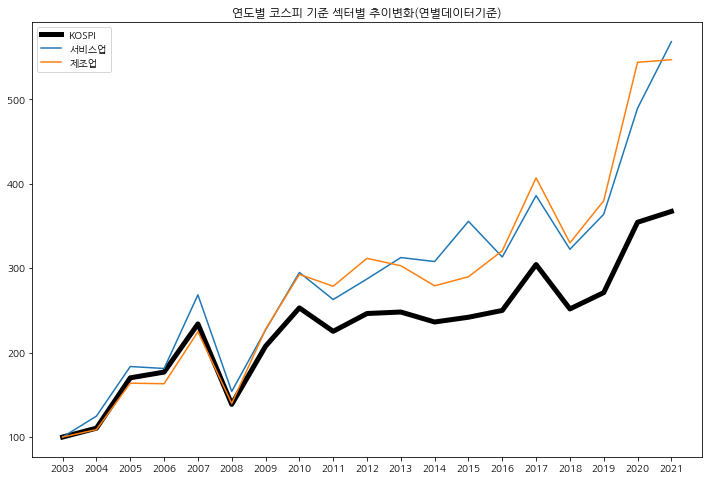

In [18]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_서비스업_index,label = "서비스업")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")

plt.legend()
plt.title("연도별 코스피 기준 섹터별 추이변화(연별데이터기준)")
plt.show()

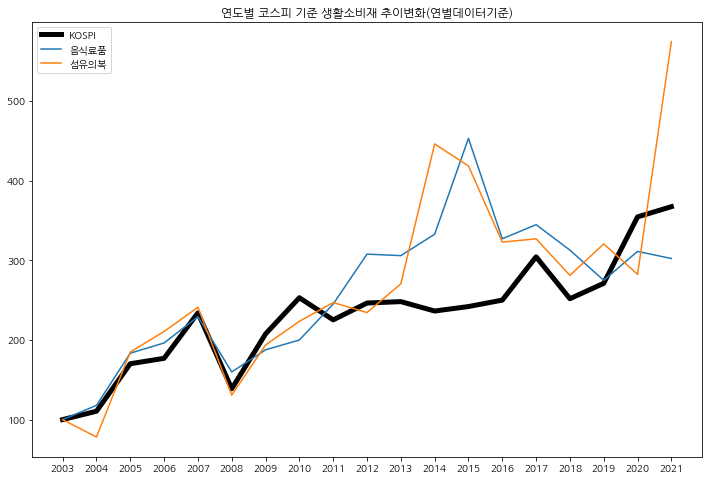

In [19]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_음식료품_index,label = "음식료품")
ax.plot(xtick_label_position,df_sector_year_섬유의복_index,label = "섬유의복")

plt.legend()
plt.title("연도별 코스피 기준 생활소비재 추이변화(연별데이터기준)")
plt.show()

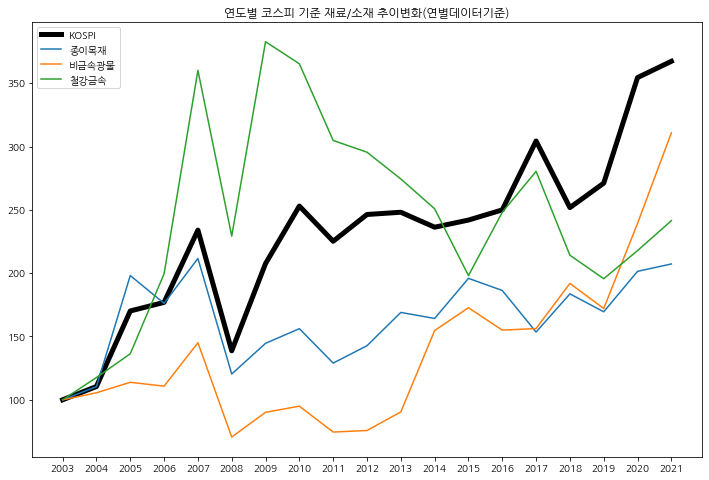

In [20]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_종이목재_index,label = "종이목재")
ax.plot(xtick_label_position,df_sector_year_비금속광물_index,label = "비금속광물")
ax.plot(xtick_label_position,df_sector_year_철강금속_index,label = "철강금속")

plt.legend()
plt.title("연도별 코스피 기준 재료/소재 추이변화(연별데이터기준)")
plt.show()

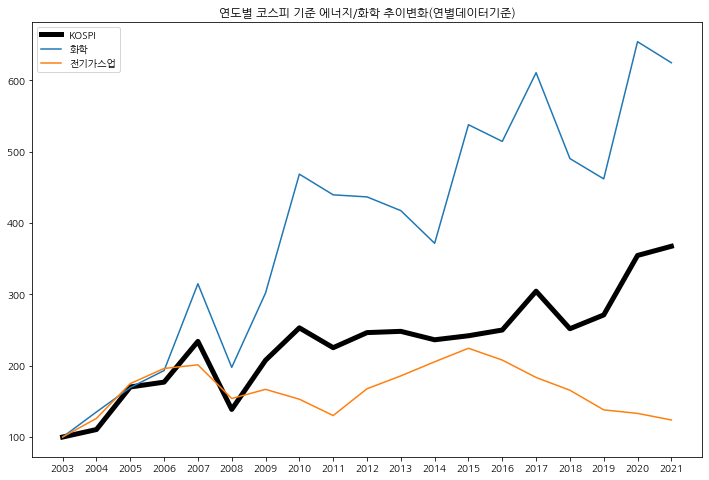

In [21]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_화학_index,label = "화학")
ax.plot(xtick_label_position,df_sector_year_전기가스업_index,label = "전기가스업")

plt.legend()
plt.title("연도별 코스피 기준 에너지/화학 추이변화(연별데이터기준)")
plt.show()

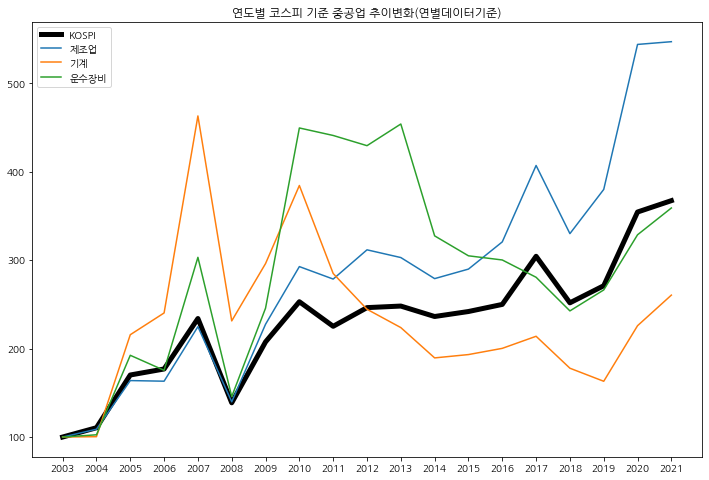

In [22]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")
ax.plot(xtick_label_position,df_sector_year_기계_index,label = "기계")
ax.plot(xtick_label_position,df_sector_year_운수장비_index,label = "운수장비")

plt.legend()
plt.title("연도별 코스피 기준 중공업 추이변화(연별데이터기준)")
plt.show()

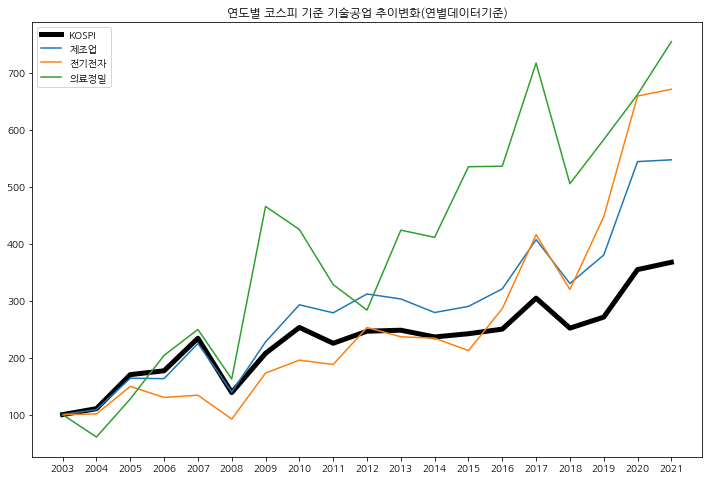

In [23]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_제조업_index,label = "제조업")
ax.plot(xtick_label_position,df_sector_year_전기전자_index,label = "전기전자")
ax.plot(xtick_label_position,df_sector_year_의료정밀_index,label = "의료정밀")

plt.legend()
plt.title("연도별 코스피 기준 기술공업 추이변화(연별데이터기준)")
plt.show()

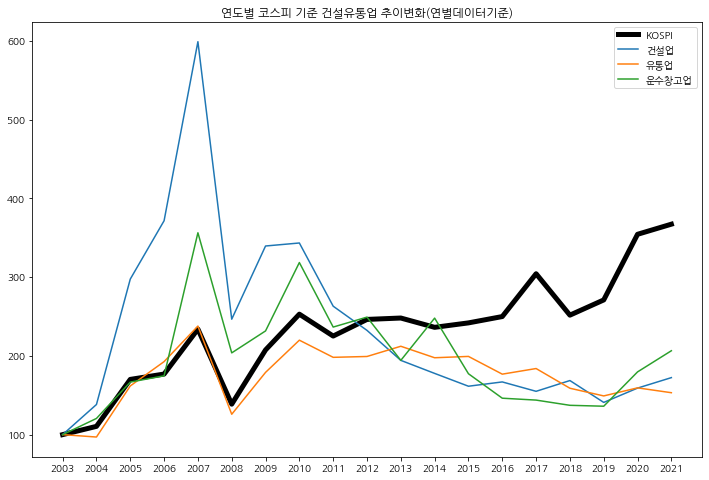

In [24]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")

ax.plot(xtick_label_position,df_sector_year_건설업_index,label = "건설업")
ax.plot(xtick_label_position,df_sector_year_유통업_index,label = "유통업")
ax.plot(xtick_label_position,df_sector_year_운수창고업_index,label = "운수창고업")

plt.legend()
plt.title("연도별 코스피 기준 건설유통업 추이변화(연별데이터기준)")
plt.show()

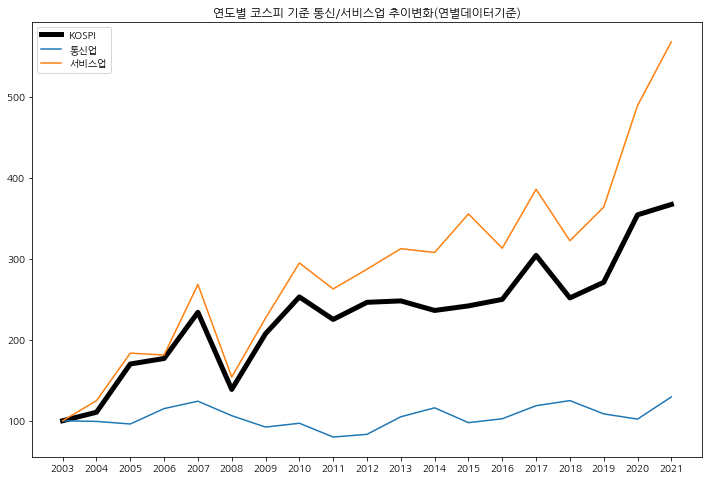

In [25]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_통신업_index,label = "통신업")
ax.plot(xtick_label_position,df_sector_year_서비스업_index,label = "서비스업")

plt.legend()
plt.title("연도별 코스피 기준 통신/서비스업 추이변화(연별데이터기준)")
plt.show()

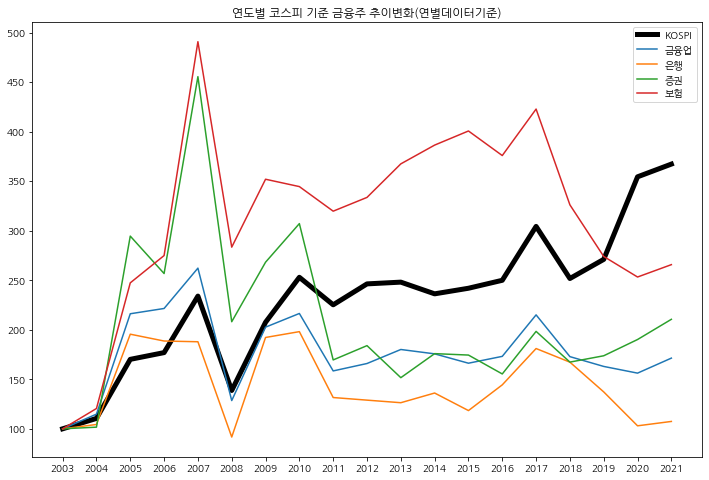

In [26]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_year['date'].dt.year.unique())
ax.plot(xtick_label_position,df_sector_year_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(xtick_label_position,df_sector_year_금융업_index,label = "금융업")
ax.plot(xtick_label_position,df_sector_year_은행_index,label = "은행")
ax.plot(xtick_label_position,df_sector_year_증권_index,label = "증권")
ax.plot(xtick_label_position,df_sector_year_보험_index,label = "보험")


plt.legend()
plt.title("연도별 코스피 기준 금융주 추이변화(연별데이터기준)")
plt.show()

# 월별 코스피 기준 섹터별 추이변화

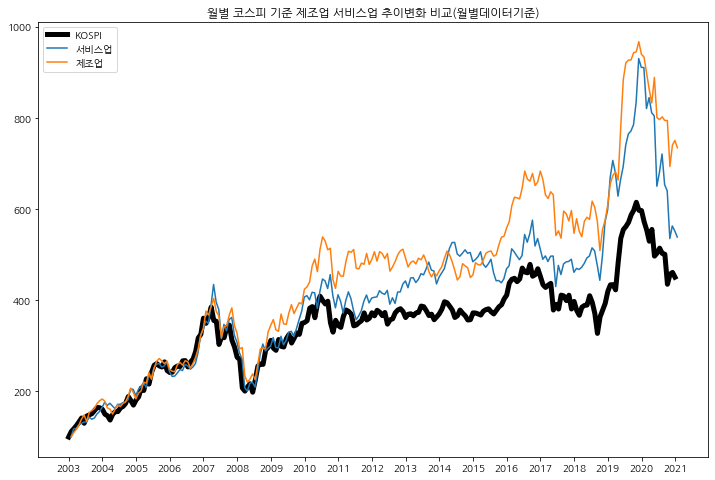

In [27]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)

ax.plot(df_sector_month_코스피_index, linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_서비스업_index,label = "서비스업")
ax.plot(df_sector_month_제조업_index,label = "제조업")

plt.legend()
plt.title("월별 코스피 기준 제조업 서비스업 추이변화 비교(월별데이터기준)")
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())

plt.show()

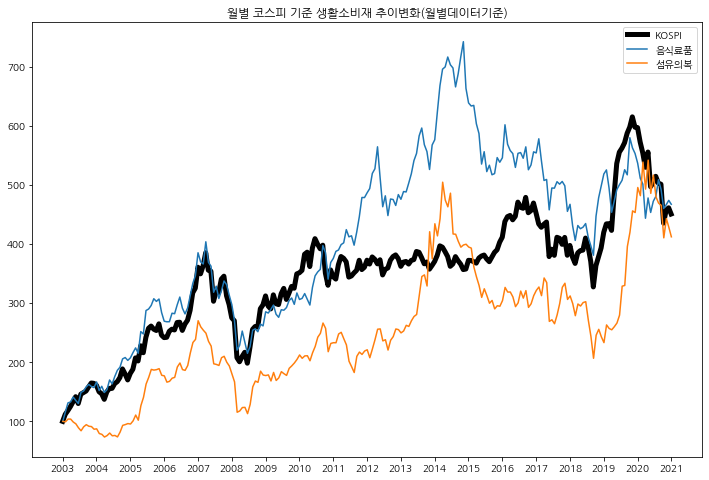

In [28]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_음식료품_index,label = "음식료품")
ax.plot(df_sector_month_섬유의복_index,label = "섬유의복")

plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.legend()
plt.title("월별 코스피 기준 생활소비재 추이변화(월별데이터기준)")
plt.show()

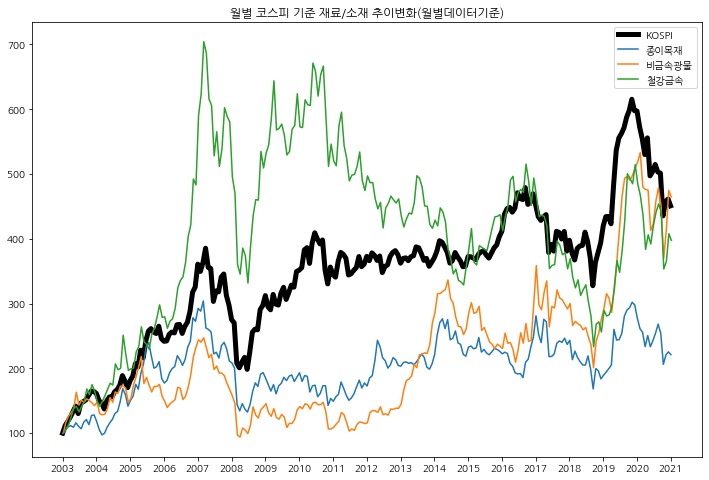

In [29]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_종이목재_index,label = "종이목재")
ax.plot(df_sector_month_비금속광물_index,label = "비금속광물")
ax.plot(df_sector_month_철강금속_index,label = "철강금속")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 재료/소재 추이변화(월별데이터기준)")
plt.show()

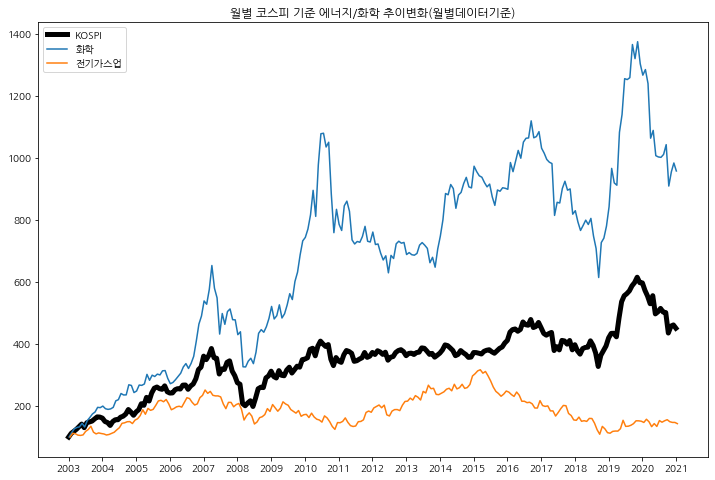

In [30]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_화학_index,label = "화학")
ax.plot(df_sector_month_전기가스업_index,label = "전기가스업")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 에너지/화학 추이변화(월별데이터기준)")
plt.show()

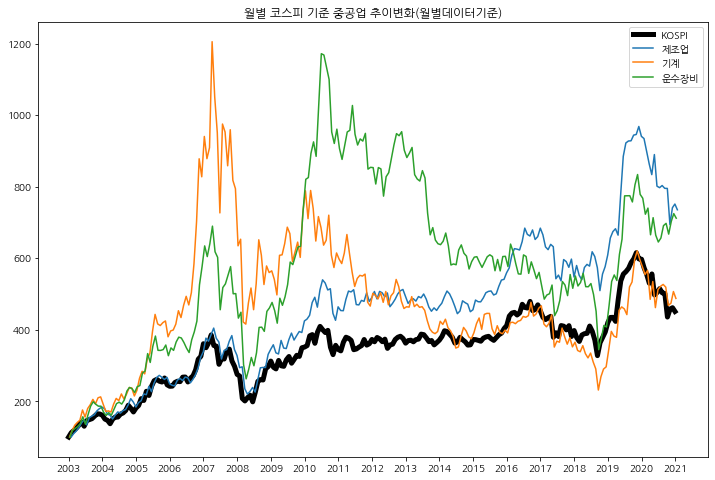

In [31]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_제조업_index,label = "제조업")
ax.plot(df_sector_month_기계_index,label = "기계")
ax.plot(df_sector_month_운수장비_index,label = "운수장비")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 중공업 추이변화(월별데이터기준)")
plt.show()

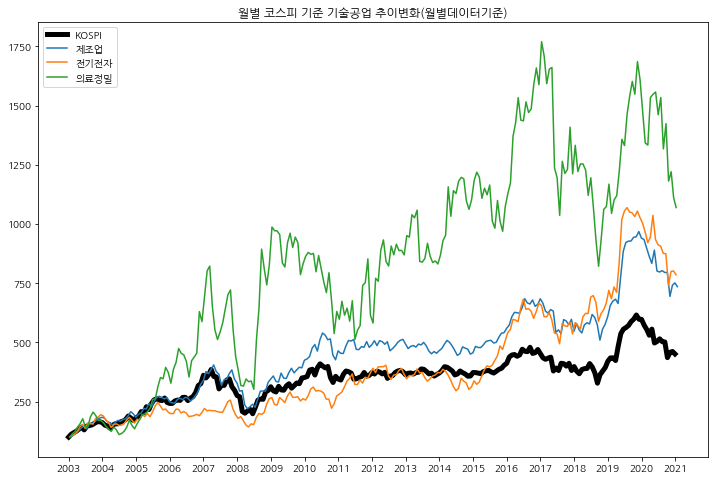

In [32]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_제조업_index,label = "제조업")
ax.plot(df_sector_month_전기전자_index,label = "전기전자")
ax.plot(df_sector_month_의료정밀_index,label = "의료정밀")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 기술공업 추이변화(월별데이터기준)")
plt.show()

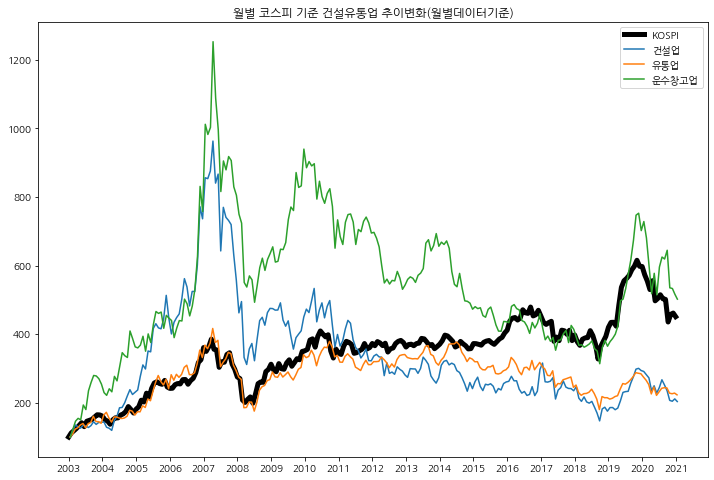

In [33]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")

ax.plot(df_sector_month_건설업_index,label = "건설업")
ax.plot(df_sector_month_유통업_index,label = "유통업")
ax.plot(df_sector_month_운수창고업_index,label = "운수창고업")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 건설유통업 추이변화(월별데이터기준)")
plt.show()

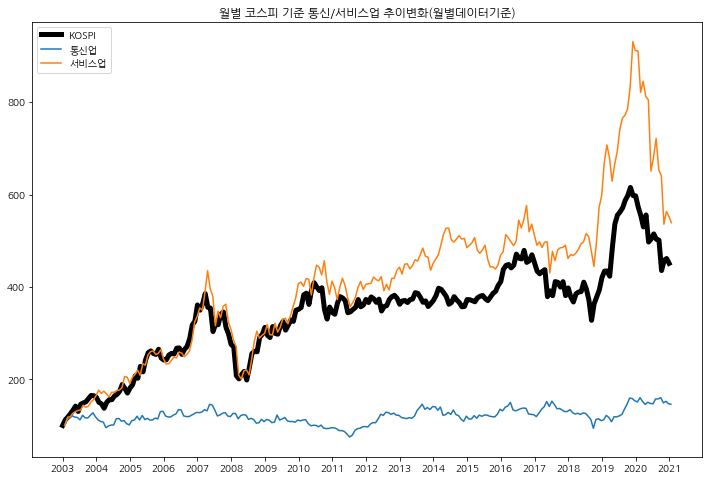

In [34]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_통신업_index,label = "통신업")
ax.plot(df_sector_month_서비스업_index,label = "서비스업")

plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 통신/서비스업 추이변화(월별데이터기준)")
plt.show()

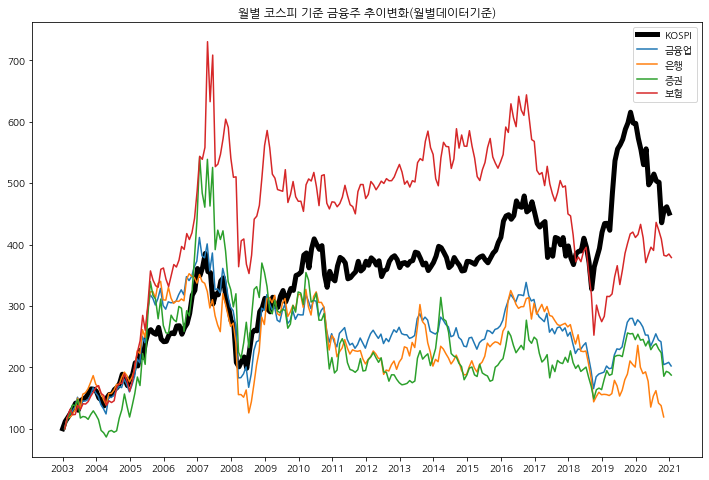

In [35]:
fig  =  plt.figure(figsize = (12,8))
ax  =  fig.add_subplot(1,1,1)
xtick_label_position  = list(range(len(df_sector_month['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_sector_month['date'].dt.year.unique())
ax.plot(df_sector_month_코스피_index,linewidth=5, color='k', label = "KOSPI")
ax.plot(df_sector_month_금융업_index,label = "금융업")
ax.plot(df_sector_month_은행_index,label = "은행")
ax.plot(df_sector_month_증권_index,label = "증권")
ax.plot(df_sector_month_보험_index,label = "보험")


plt.legend()
plt.xticks(list(i for i in range(0,240*23,13*23)),df_sector_year['date'].dt.year.unique())
plt.title("월별 코스피 기준 금융주 추이변화(월별데이터기준)")
plt.show()

# 산업별 비중 pie

In [36]:
# 전처리
산업 = df[df['date']=='2022-01-26'][1:]
전체_산업_시총 = 산업['Market_Cap'].sum()
sector_name_list = 산업['sector_name'].unique()
각_산업_시총_비중 = {}

for sec in sector_name_list:
    tmp = (산업[산업['sector_name']==sec]['Market_Cap']).item()
    각_산업_시총_비중[sec] = tmp/전체_산업_시총*100
    
각_산업_시총_비중 = pd.DataFrame(list(각_산업_시총_비중.items()),
                   columns=['산업','비중'])
각_산업_시총_비중 = 각_산업_시총_비중.sort_values(by='비중',ascending=False)
ratio = 각_산업_시총_비중['비중']
labels = 각_산업_시총_비중['산업']

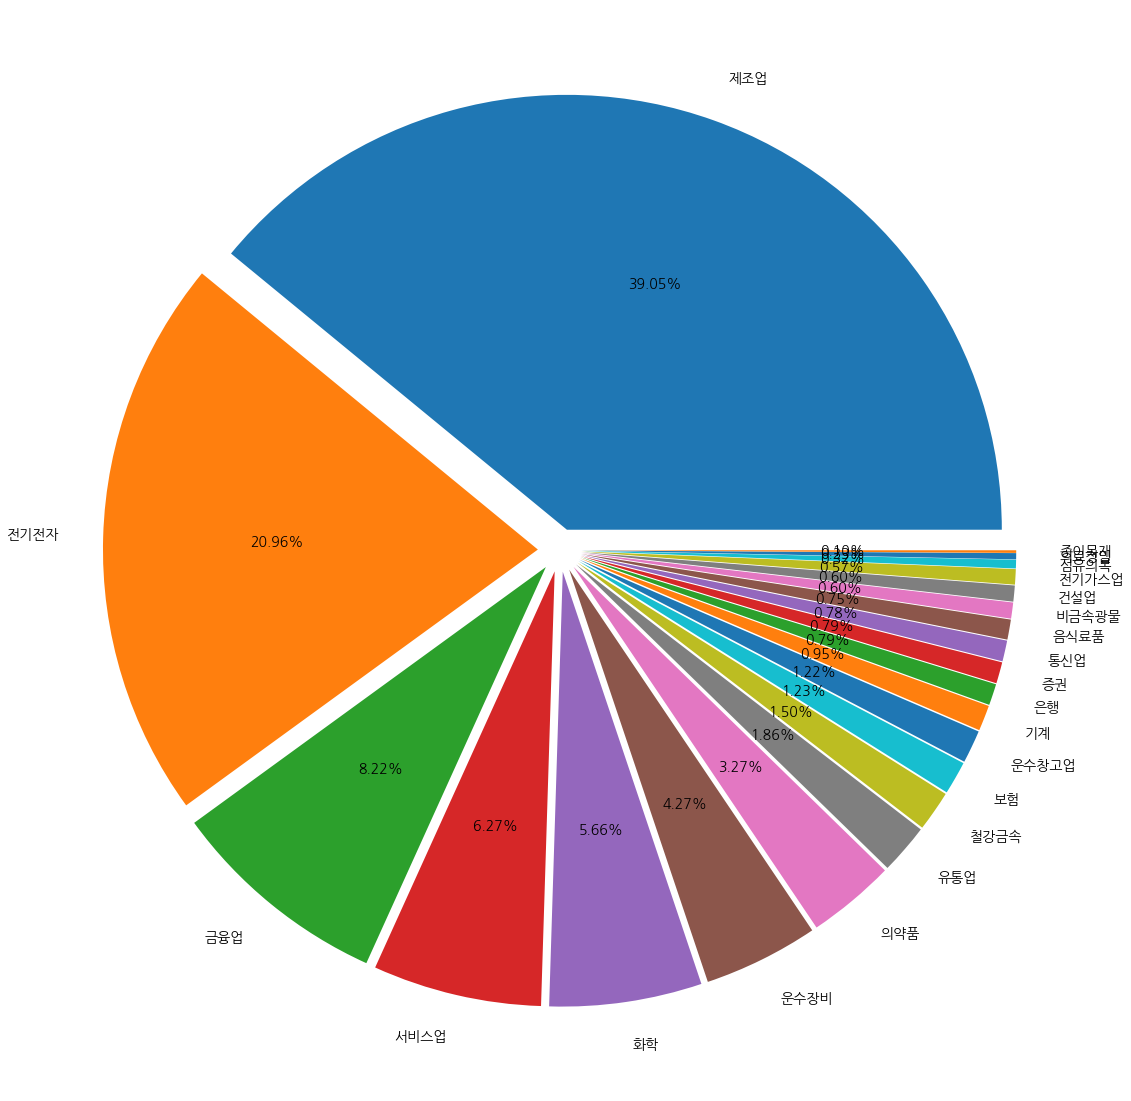

In [37]:
# 시각화 - 파이차트
plt.pie(ratio, labels=labels, autopct='%.2f%%', explode= [0.05]*len(ratio),textprops={'fontsize': 14})
plt.show()

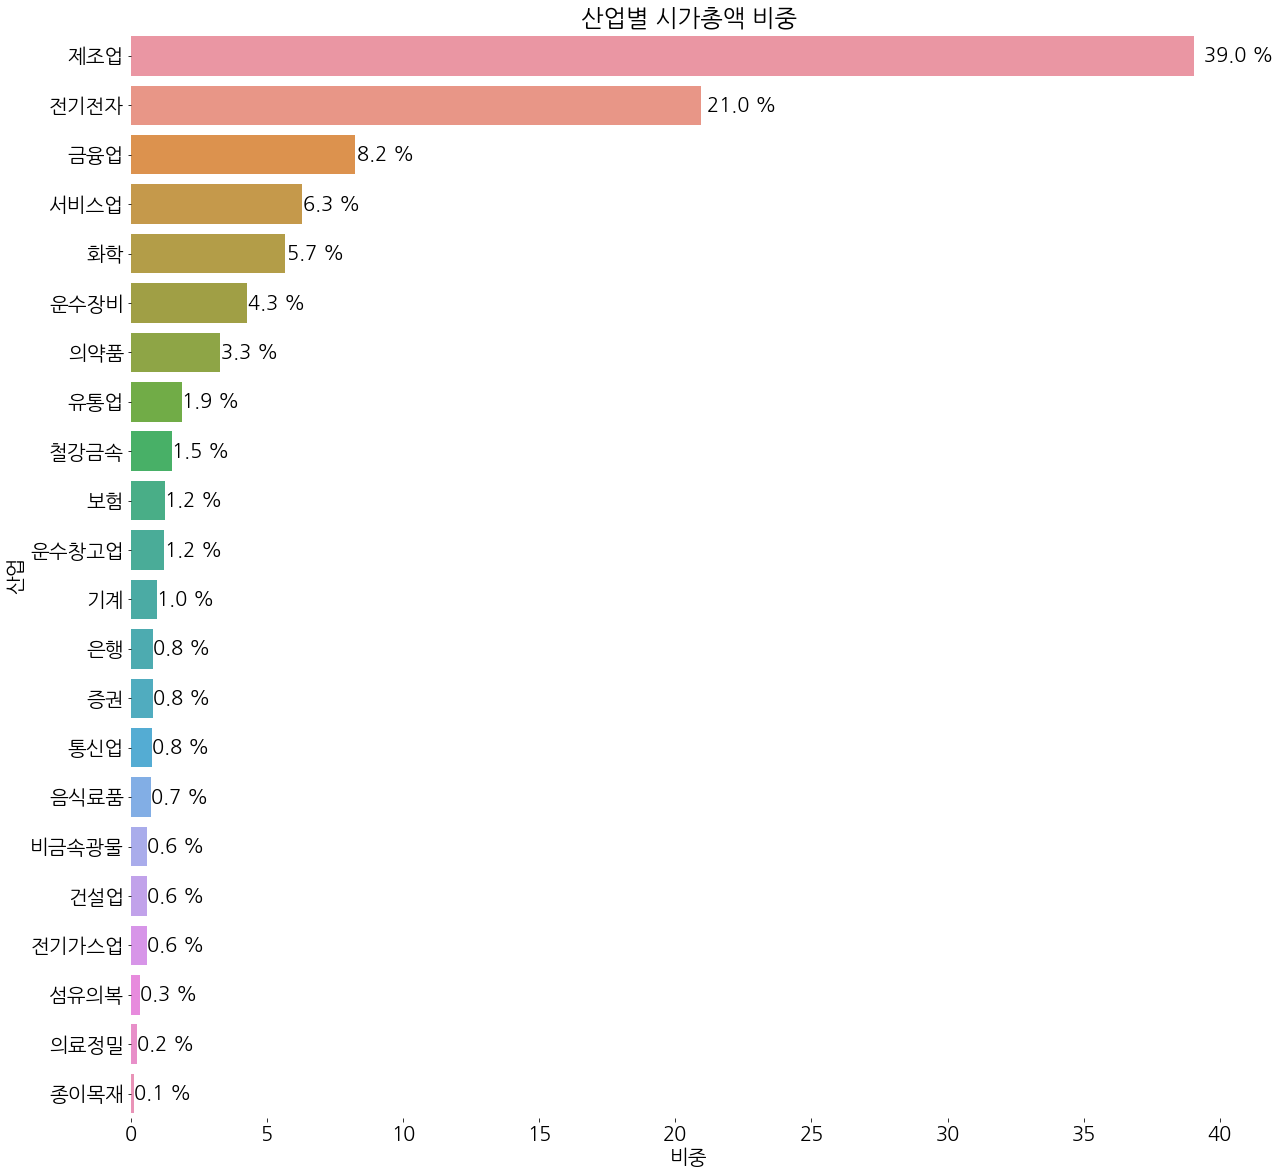

In [38]:
plt.rc('font', size=20)
plt.rc('legend', fontsize=20)

ax = sns.barplot(x = ratio, y=labels)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.1f %%"%(width), va='center')
plt.title('산업별 시가총액 비중',fontweight = 'bold')
plt.sca(ax)
plt.box(False)

plt.show()

# 코스피 대비 섹터 beta

In [39]:
sector_list=['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업']

x_list = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]

In [40]:
# 베타 구하기
beta = []
for x in x_list:
    beta.append(get_beta(코스피,x,'2022-01-01','2022-09-01'))

tmp={}
for i in range(len(x_list)):
    tmp[sector_list[i]] = beta[i]
    
tmp = pd.DataFrame(list(tmp.items()),
                   columns=['sector_list','beta'])
beta = tmp.sort_values(by='beta',ascending=False)
beta = beta.reset_index().drop('index',axis=1)
beta = beta.fillna(0)
beta

,sector_list,beta
0,코스피,1.000
1,제조업,0.965
2,금융업,0.808
3,전기전자,0.799
4,유통업,0.767
5,증권,0.713
6,서비스업,0.628
7,화학,0.610
8,운수장비,0.577
9,음식료품,0.562


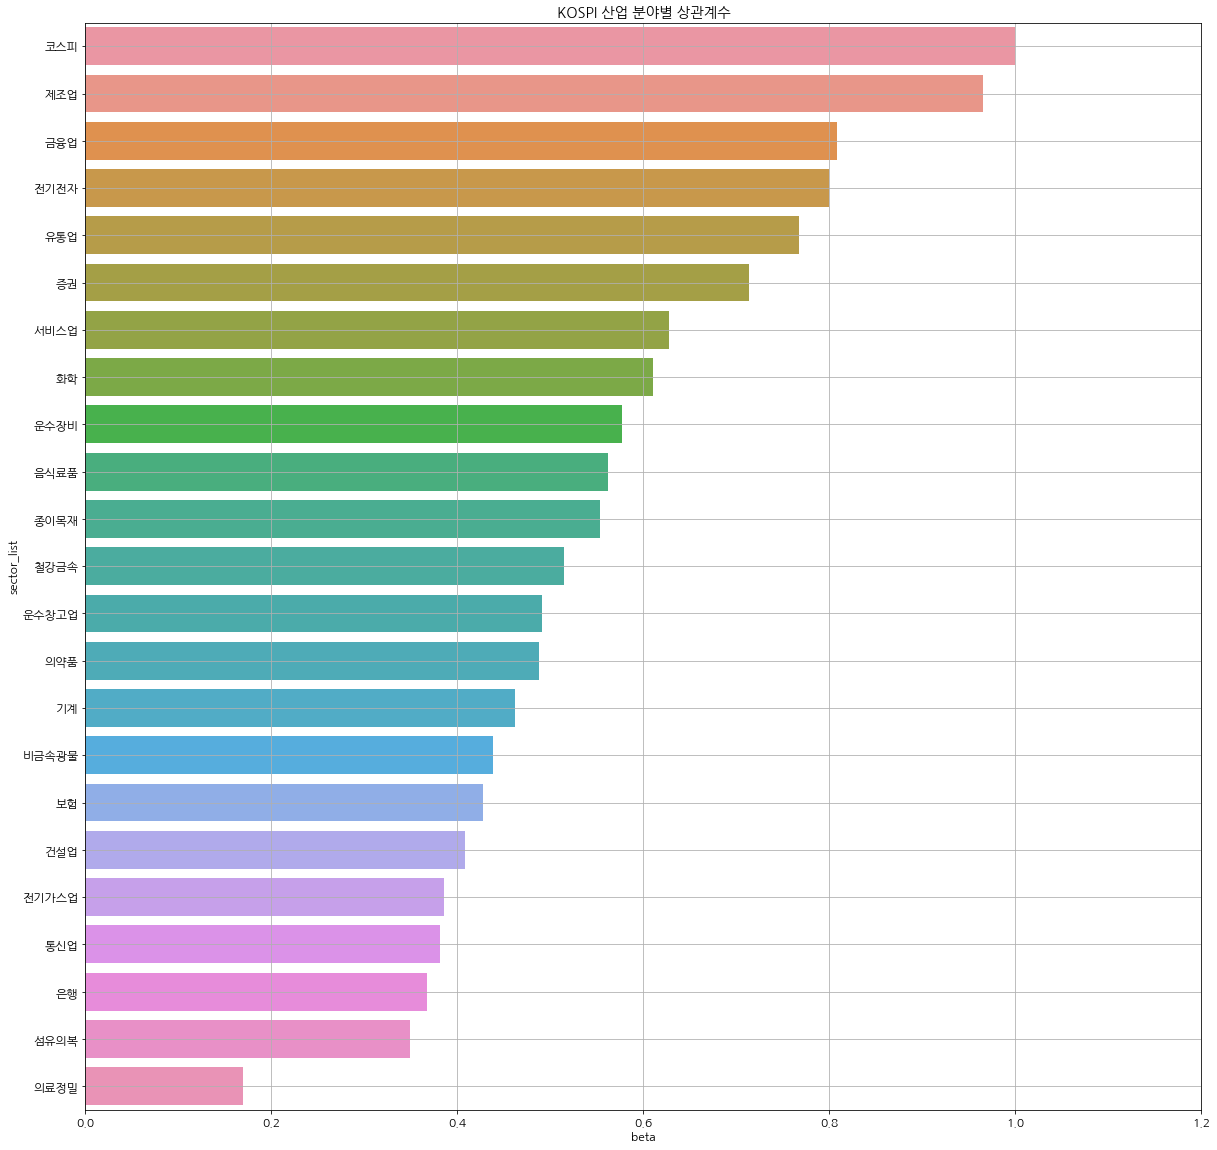

In [41]:
plt.figure(figsize=(20,20))
plt.rc('font', size=12)
plt.title('KOSPI 산업 분야별 상관계수')
sns.barplot(x = beta['beta'], y=beta['sector_list'])
plt.grid(True)
plt.xlim(0,1.2)
plt.show()

# 코스피 대비 섹터 상관계수 line

In [42]:
corr = {}
x = x_list[0]
for j in range(len(x_list)):
    y = x_list[j]
    corr[sector_list[j]] = get_corr(x,y,'2022-01-01','2022-09-01')
corr = pd.DataFrame(list(corr.items()),columns=['sector_list',sector_list[0]])

for i in range(1,len(x_list)):
    tmp = {}
    x = x_list[i]
    for j in range(len(x_list)):
        y = x_list[j]
        tmp[sector_list[j]] = get_corr(x,y,'2022-01-01','2022-09-01')
    tmp = pd.DataFrame(list(tmp.items()),columns=['sector_list',sector_list[i]])
    corr = pd.merge(corr,tmp)  
corr = corr.set_index('sector_list')
corr

,코스피,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업,제조업
sector_list,,,,,,,,,,,,,,,,,,,,,
코스피,1.000,0.578,0.618,0.730,0.869,0.677,0.702,0.715,0.723,0.895,...,0.510,0.671,0.697,0.364,0.871,0.609,0.848,0.532,0.876,0.983
음식료품,0.578,1.000,0.430,0.562,0.543,0.432,0.419,0.453,0.424,0.432,...,0.291,0.426,0.448,0.218,0.533,0.287,0.446,0.409,0.496,0.555
섬유의복,0.618,0.430,1.000,0.508,0.587,0.431,0.447,0.436,0.431,0.522,...,0.364,0.414,0.505,0.130,0.507,0.318,0.543,0.281,0.559,0.604
종이목재,0.730,0.562,0.508,1.000,0.691,0.470,0.605,0.616,0.614,0.574,...,0.350,0.595,0.632,0.241,0.628,0.339,0.647,0.393,0.648,0.706
화학,0.869,0.543,0.587,0.691,1.000,0.522,0.687,0.682,0.703,0.700,...,0.447,0.621,0.638,0.292,0.749,0.478,0.731,0.490,0.702,0.865
의약품,0.677,0.432,0.431,0.470,0.522,1.000,0.453,0.373,0.446,0.528,...,0.425,0.434,0.466,0.237,0.557,0.488,0.542,0.300,0.665,0.655
비금속광물,0.702,0.419,0.447,0.605,0.687,0.453,1.000,0.625,0.614,0.592,...,0.315,0.519,0.442,0.202,0.597,0.385,0.620,0.336,0.588,0.700
철강금속,0.715,0.453,0.436,0.616,0.682,0.373,0.625,1.000,0.644,0.519,...,0.513,0.670,0.585,0.399,0.752,0.470,0.697,0.547,0.527,0.678
기계,0.723,0.424,0.431,0.614,0.703,0.446,0.614,0.644,1.000,0.505,...,0.526,0.741,0.596,0.331,0.666,0.514,0.620,0.425,0.613,0.683


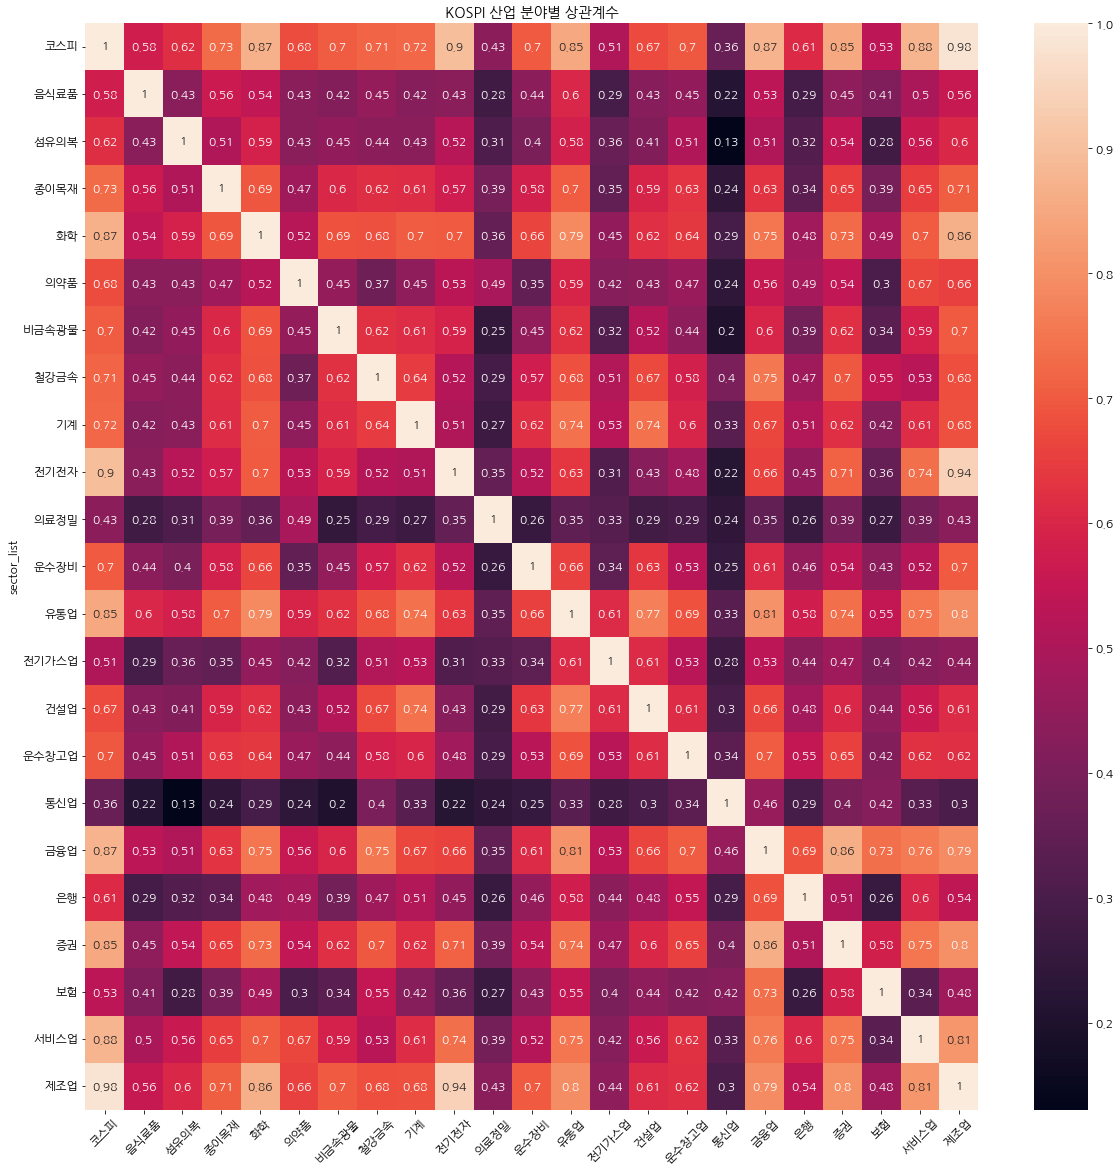

In [43]:
plt.figure(figsize=(20,20))
plt.rc('font', size=12)
plt.title('KOSPI 산업 분야별 상관계수')
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 경제섹터별 비중 pie

In [44]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (20, 20) 

In [45]:
경제섹터 = df_200[df_200['date']=='2022-09-01']
경제섹터

,sector_ticker,sector_name,date,open,close,high,low,volume,volume($),Market_Cap,Range,PER,FWDPER,PBR,dividend_Yield
3003,1150,코스피 200 커뮤니케이션서비스,2022-09-01,2026.82,2001.20,2029.31,1992.45,6419223,462270992850,130882633628450,-2.43,12.59,0.0,1.41,1.73
6631,1151,코스피 200 건설,2022-09-01,275.10,268.50,275.99,268.49,8166246,279681776130,38677792711510,-3.49,9.49,0.0,0.90,1.55
10259,1152,코스피 200 중공업,2022-09-01,313.13,301.92,314.33,301.92,33715338,724263614130,55008022328310,-4.32,0.00,0.0,1.21,0.41
13887,1153,코스피 200 철강/소재,2022-09-01,842.37,821.80,851.30,821.80,12292723,355350054000,44365139836000,-3.72,3.46,0.0,0.48,3.34
17515,1154,코스피 200 에너지/화학,2022-09-01,1672.28,1642.41,1676.29,1642.41,9746521,871832262750,151463306302750,-3.02,8.24,0.0,0.95,2.57
21143,1155,코스피 200 정보기술,2022-09-01,2855.36,2815.38,2855.36,2814.97,22767623,1581721132549,535999673365900,-3.01,10.03,0.0,1.10,1.42
24771,1156,코스피 200 금융,2022-09-01,583.36,570.33,584.35,570.21,19344163,437219344216,138988790769915,-3.39,4.49,0.0,0.43,5.60
28399,1157,코스피 200 생활소비재,2022-09-01,873.97,863.39,873.97,863.39,4106838,209202517485,88318876323600,-1.83,0.00,0.0,0.64,2.26
32027,1158,코스피 200 경기소비재,2022-09-01,1555.84,1552.16,1563.65,1538.13,8719834,520300529180,155137970417850,-1.35,10.48,0.0,0.77,2.22
35031,1159,코스피 200 산업재,2022-09-01,637.63,627.60,640.78,627.52,55550736,868528005527,199827318092775,-2.42,7.35,0.0,1.25,1.48


In [46]:
전체_경제섹터_시총 = 경제섹터['Market_Cap'].sum()
경제섹터_list = 경제섹터['sector_name'].unique()
각_경제섹터_시총_비중 = {}

for sec in 경제섹터_list:
    tmp = (경제섹터[경제섹터['sector_name']==sec]['Market_Cap']).item()
    각_경제섹터_시총_비중[sec] = tmp/전체_경제섹터_시총*100
    
각_경제섹터_시총_비중 = pd.DataFrame(list(각_경제섹터_시총_비중.items()),
                   columns=['경제섹터','비중'])
각_경제섹터_시총_비중 = 각_경제섹터_시총_비중.sort_values(by='비중',ascending=False)
ratio = 각_경제섹터_시총_비중['비중']
labels = 각_경제섹터_시총_비중['경제섹터']

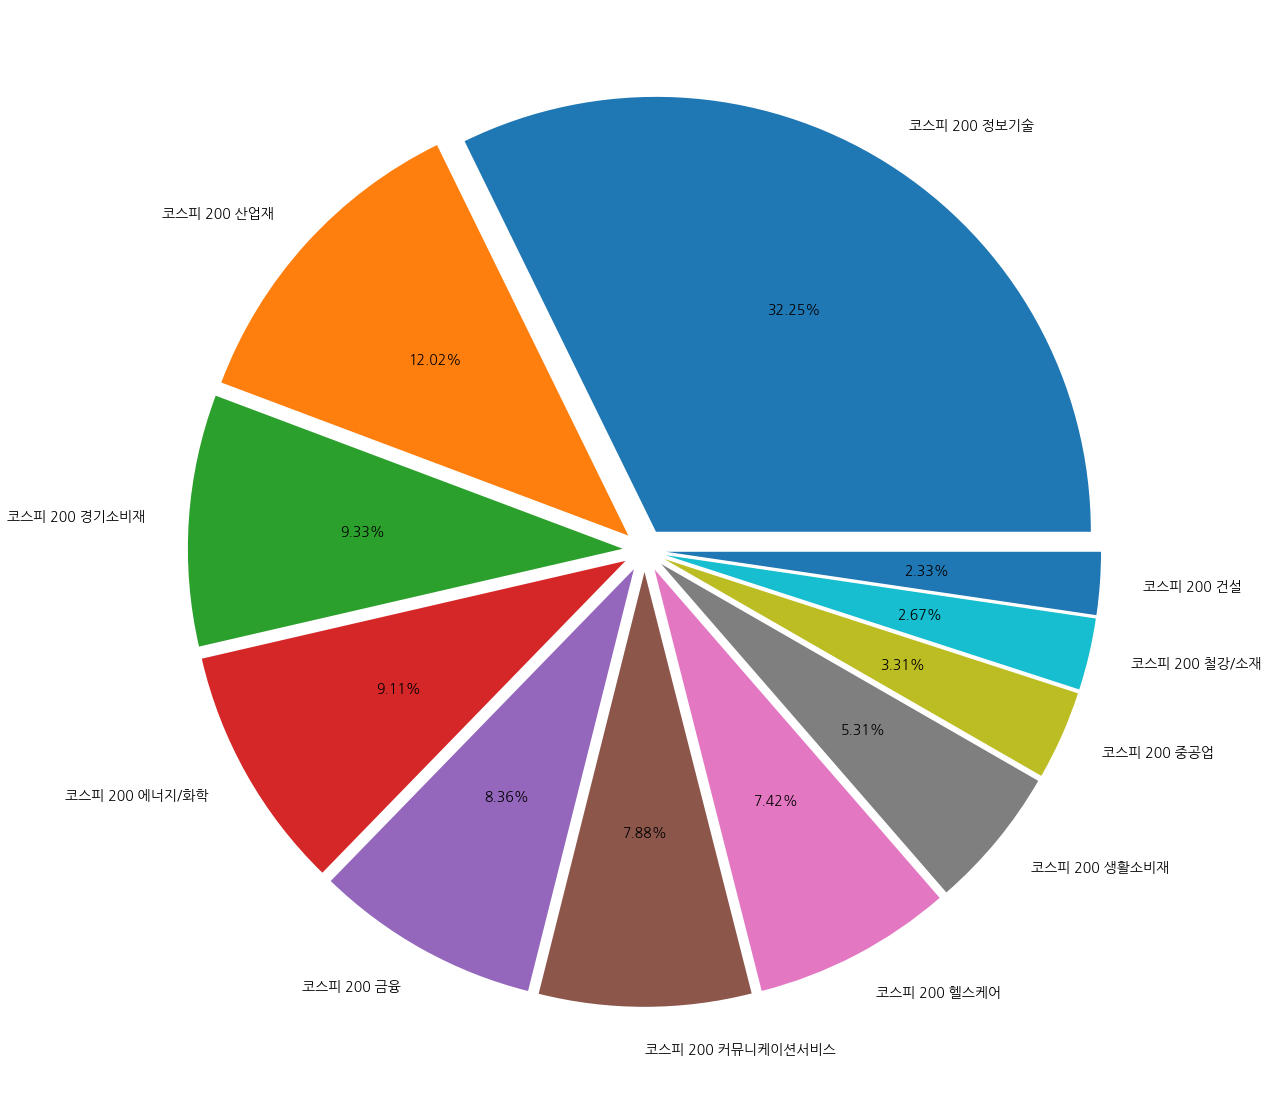

In [47]:
# 시각화 - 파이차트
plt.pie(ratio, labels=labels, autopct='%.2f%%', explode= [0.05]*len(ratio),textprops={'fontsize': 14})
plt.show()

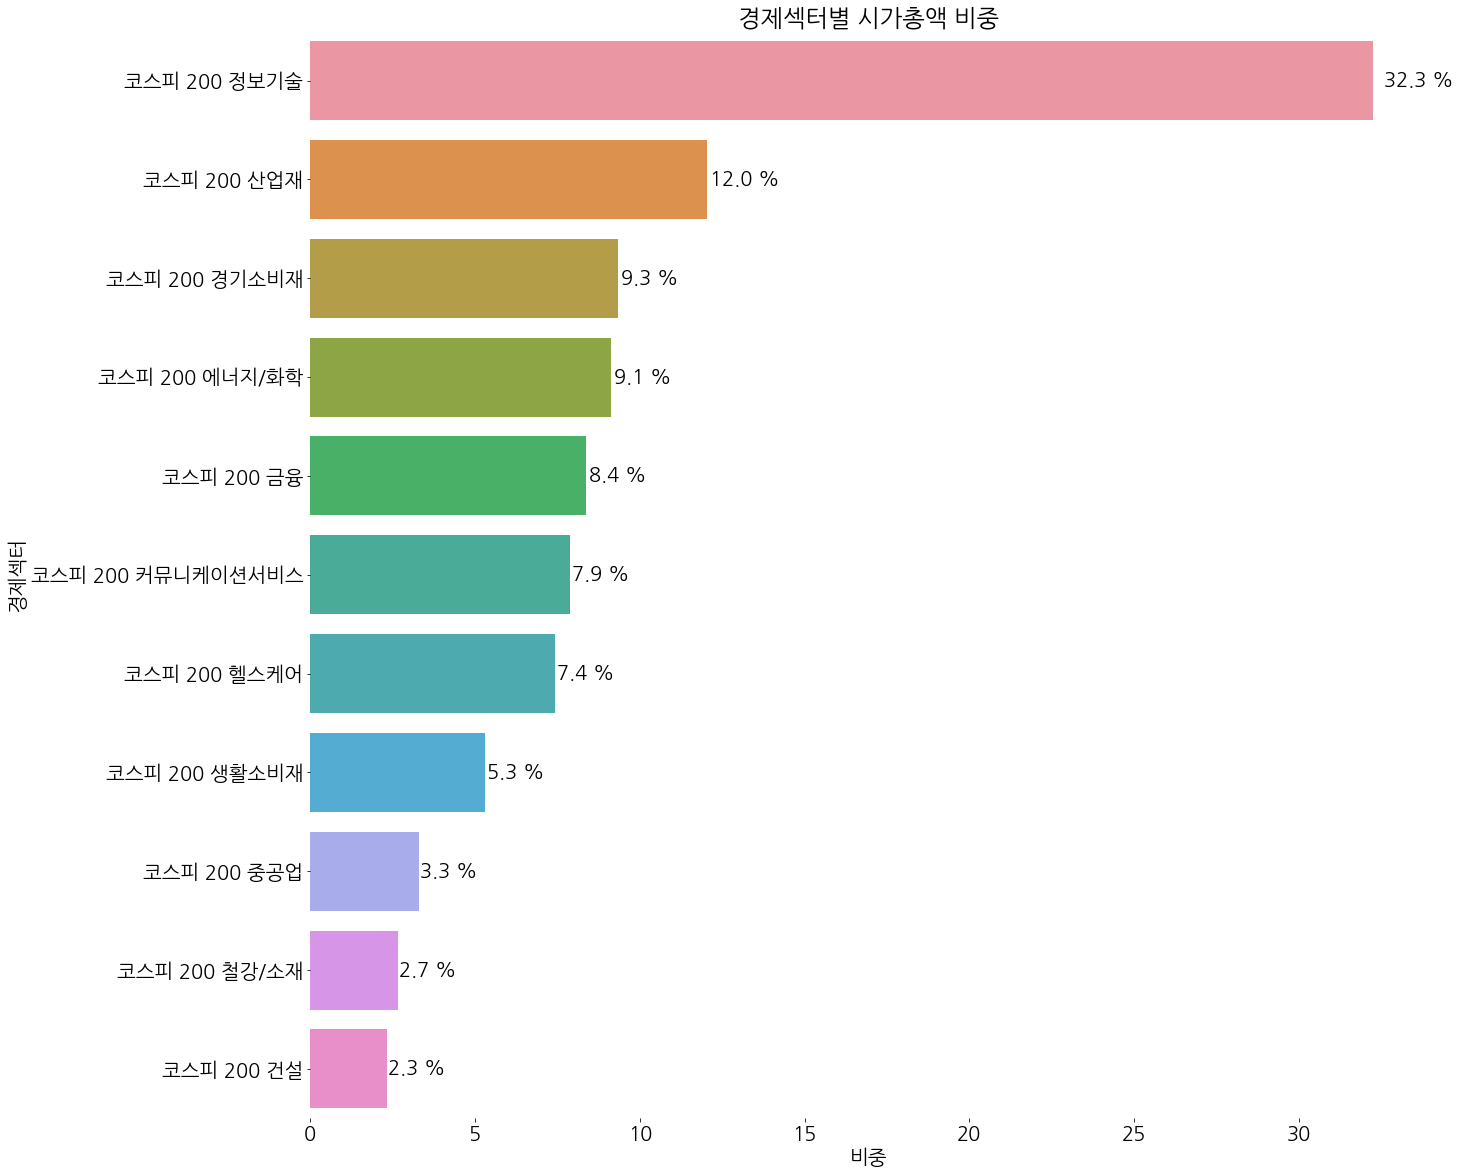

In [48]:
plt.rc('font', size=20)
plt.rc('legend', fontsize=20)

ax = sns.barplot(x = ratio, y=labels)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.1f %%"%(width), va='center')
plt.title('경제섹터별 시가총액 비중',fontweight = 'bold')
plt.sca(ax)
plt.box(False)

plt.show()

## 섹터별 상대 섹터와 상관계수 구하기

ex) 운수장비와 나머지 섹터들간의 상관계수 > 정렬 분산투자 및 헤징에 대한 인사이트 제공
sec_corr_dict = {}

for 섹터명 in 섹터이름:
    for 나머지_섹터명 in 나머지 섹터:
        sec_corr_dict[섹터명] = get_corr(섹터명, 나머지_섹터명)

최종적으로 각 섹터별 상대 섹터들과의 상관계수를 시각화 -1~1

In [49]:
sec_200 = [커뮤니케이션서비스200,건설200,중공업200,철강소재200,에너지화학200,정보기술200,금융200,생활소비재200,경기소비재200,산업재200,헬스케어200]
sec_200_name = ['코스피 200 커뮤니케이션서비스', '코스피 200 건설', '코스피 200 중공업', '코스피 200 철강/소재',
       '코스피 200 에너지/화학', '코스피 200 정보기술', '코스피 200 금융', '코스피 200 생활소비재',
       '코스피 200 경기소비재', '코스피 200 산업재', '코스피 200 헬스케어']

sec_200_corr_dict = {}
temp_list = []
for idx, i in enumerate(sec_200):
    for j in sec_200:
        temp_list.append(get_corr(i,j,'2022-01-01','2022-09-01'))
    sec_200_corr_dict[sec_200_name[idx]] = temp_list
    temp_list = []



In [50]:
상관계수_200 = pd.DataFrame(sec_200_corr_dict, index = sec_200_name)
상관계수_200.reset_index().rename(columns={'index':'상대섹터'})

,상대섹터,코스피 200 커뮤니케이션서비스,코스피 200 건설,코스피 200 중공업,코스피 200 철강/소재,코스피 200 에너지/화학,코스피 200 정보기술,코스피 200 금융,코스피 200 생활소비재,코스피 200 경기소비재,코스피 200 산업재,코스피 200 헬스케어
0,코스피 200 커뮤니케이션서비스,1.000,0.484,0.385,0.464,0.634,0.725,0.525,0.556,0.565,0.617,0.648
1,코스피 200 건설,0.484,1.000,0.766,0.726,0.724,0.574,0.588,0.581,0.593,0.775,0.465
2,코스피 200 중공업,0.385,0.766,1.000,0.669,0.677,0.451,0.482,0.455,0.496,0.738,0.381
3,코스피 200 철강/소재,0.464,0.726,0.669,1.000,0.699,0.557,0.667,0.517,0.569,0.712,0.402
4,코스피 200 에너지/화학,0.634,0.724,0.677,0.699,1.000,0.761,0.613,0.594,0.645,0.795,0.546
5,코스피 200 정보기술,0.725,0.574,0.451,0.557,0.761,1.000,0.544,0.593,0.662,0.666,0.631
6,코스피 200 금융,0.525,0.588,0.482,0.667,0.613,0.544,1.000,0.481,0.546,0.640,0.368
7,코스피 200 생활소비재,0.556,0.581,0.455,0.517,0.594,0.593,0.481,1.000,0.643,0.680,0.555
8,코스피 200 경기소비재,0.565,0.593,0.496,0.569,0.645,0.662,0.546,0.643,1.000,0.646,0.493
9,코스피 200 산업재,0.617,0.775,0.738,0.712,0.795,0.666,0.640,0.680,0.646,1.000,0.578


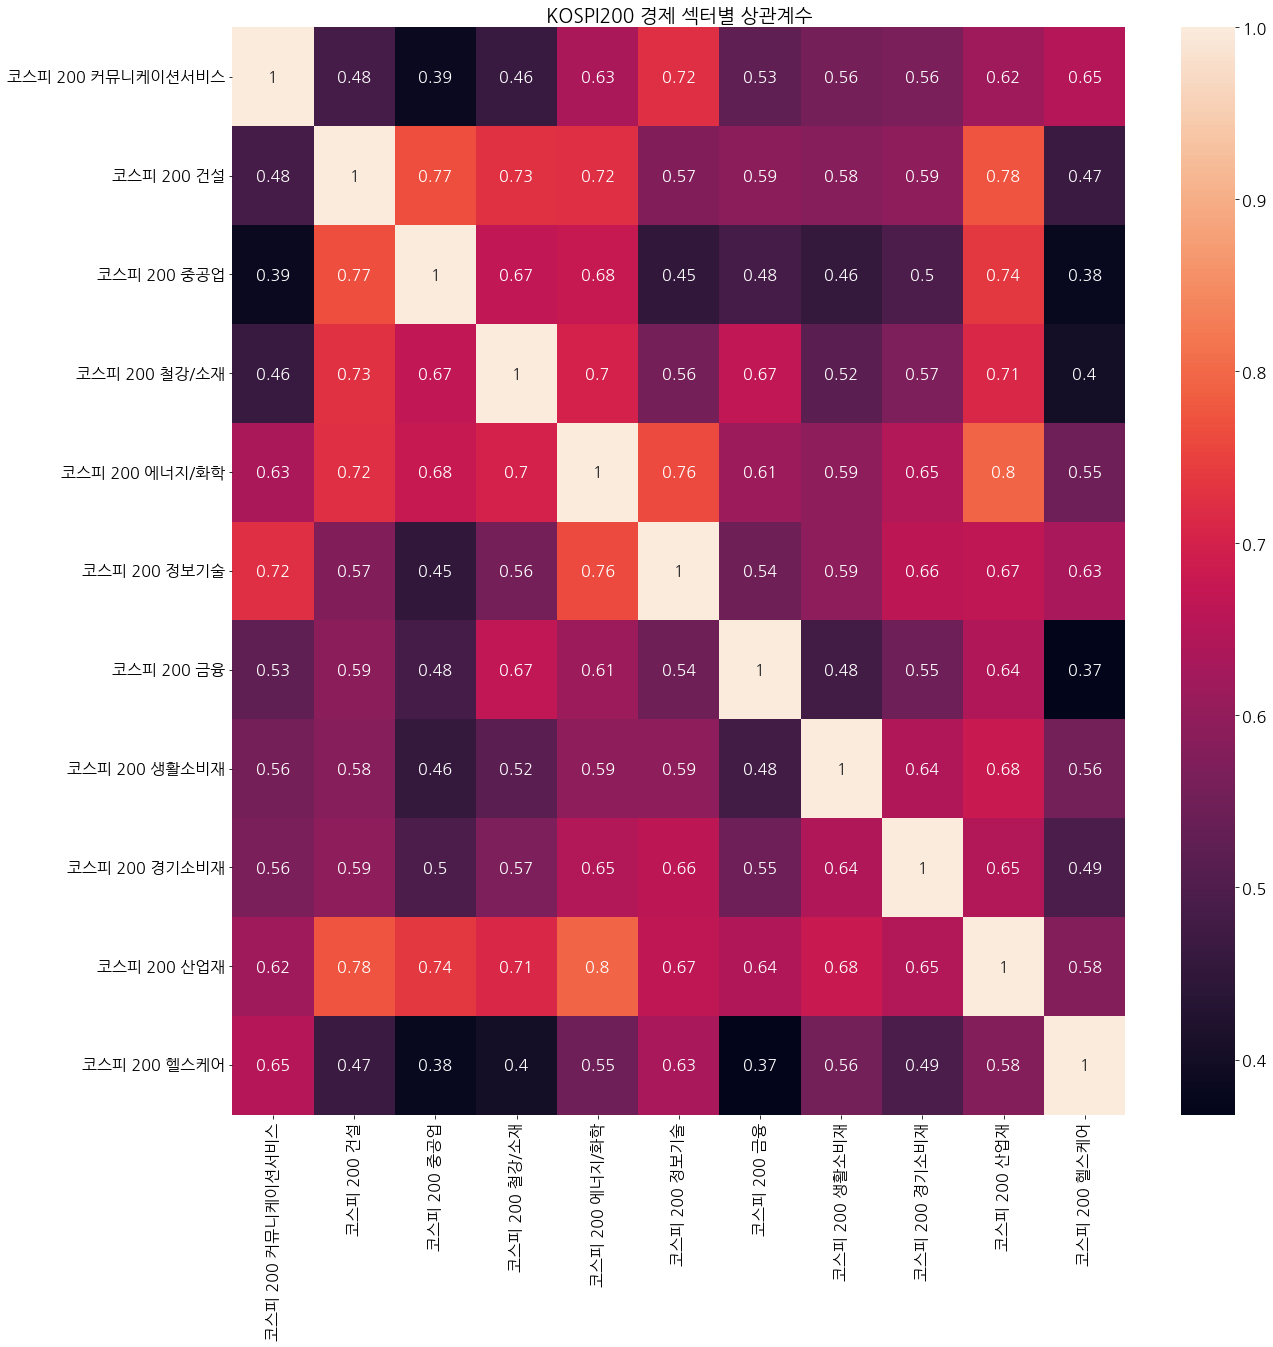

In [51]:
plt.figure(figsize=(20,20))
plt.rc('font', size=16)
plt.title('KOSPI200 경제 섹터별 상관계수')
sns.heatmap(data=상관계수_200, annot=True)

plt.show()

# MDD bar 5년, 10년, 200 4년 MDD

In [52]:
sec = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]
sec_name_5 = ['코스피_5', '음식료품_5', '섬유의복_5', '종이목재_5', '화학_5', '의약품_5', '비금속광물_5', '철강금속_5', '기계_5',
       '전기전자_5', '의료정밀_5', '운수장비_5', '유통업_5', '전기가스업_5', '건설업_5', '운수창고업_5', '통신업_5',
       '금융업_5', '은행_5', '증권_5', '보험_5', '서비스업_5', '제조업_5']

sec_5_dict = {}

In [53]:
for idx, name in enumerate(sec):
    sec_5_dict[sec_name_5[idx]] = round(get_mdd_5(name),3)


Int64Index([4989], dtype='int64')
Int64Index([10588], dtype='int64')
Int64Index([16185], dtype='int64')
Int64Index([21780], dtype='int64')
Int64Index([27377], dtype='int64')
Int64Index([32822], dtype='int64')
Int64Index([38571], dtype='int64')
Int64Index([44170], dtype='int64')
Int64Index([49767], dtype='int64')
Int64Index([55065], dtype='int64')
Int64Index([60959], dtype='int64')
Int64Index([66557], dtype='int64')
Int64Index([72155], dtype='int64')
Int64Index([77750], dtype='int64')
Int64Index([83347], dtype='int64')
Int64Index([88944], dtype='int64')
Int64Index([94543], dtype='int64')
Int64Index([100139], dtype='int64')
Int64Index([105735], dtype='int64')
Int64Index([111286], dtype='int64')
Int64Index([116882], dtype='int64')
Int64Index([122478], dtype='int64')
Int64Index([128075], dtype='int64')


In [54]:
sec_5_dict

{'코스피_5': -44.79,
 '음식료품_5': -49.34,
 '섬유의복_5': -52.04,
 '종이목재_5': -57.82,
 '화학_5': -56.16,
 '의약품_5': -53.03,
 '비금속광물_5': -57.36,
 '철강금속_5': -65.09,
 '기계_5': -61.26,
 '전기전자_5': -34.17,
 '의료정밀_5': -67.3,
 '운수장비_5': -56.84,
 '유통업_5': -53.82,
 '전기가스업_5': -62.42,
 '건설업_5': -67.31,
 '운수창고업_5': -50.81,
 '통신업_5': -44.96,
 '금융업_5': -62.88,
 '은행_5': -64.72,
 '증권_5': -62.59,
 '보험_5': -71.24,
 '서비스업_5': -37.07,
 '제조업_5': -40.06}

In [55]:
sec = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]
sec_name_10 = ['코스피_10', '음식료품_10', '섬유의복_10', '종이목재_10', '화학_10', '의약품_10', '비금속광물_10', '철강금속_10', '기계_10',
       '전기전자_10', '의료정밀_10', '운수장비_10', '유통업_10', '전기가스업_10', '건설업_10', '운수창고업_10', '통신업_10',
       '금융업_10', '은행_10', '증권_10', '보험_10', '서비스업_10', '제조업_10']

sec_10_dict = {}

In [56]:
for idx, name in enumerate(sec):
    sec_10_dict[sec_name_10[idx]] = round(get_mdd_10(name),3)

Int64Index([4989], dtype='int64')
Int64Index([10588], dtype='int64')
Int64Index([16185], dtype='int64')
Int64Index([21780], dtype='int64')
Int64Index([27377], dtype='int64')
Int64Index([31123], dtype='int64')
Int64Index([36787], dtype='int64')
Int64Index([44170], dtype='int64')
Int64Index([49767], dtype='int64')
Int64Index([54241], dtype='int64')
Int64Index([59181], dtype='int64')
Int64Index([66557], dtype='int64')
Int64Index([72155], dtype='int64')
Int64Index([77750], dtype='int64')
Int64Index([83347], dtype='int64')
Int64Index([88944], dtype='int64')
Int64Index([94543], dtype='int64')
Int64Index([100139], dtype='int64')
Int64Index([105735], dtype='int64')
Int64Index([111286], dtype='int64')
Int64Index([116882], dtype='int64')
Int64Index([120825], dtype='int64')
Int64Index([126954], dtype='int64')


In [57]:
df_mdd_5 = pd.DataFrame(data = sec_5_dict.values(), index = sec_5_dict.keys(), columns = ['MDD_5'])

In [58]:
df_mdd_10 = pd.DataFrame(data = sec_10_dict.values(), index = sec_10_dict.keys(), columns = ['MDD_10'])

In [59]:
df_mdd_5_modified = df_mdd_5 + 44.79
df_mdd_5_modified = df_mdd_5_modified.sort_values(by=['MDD_5'])

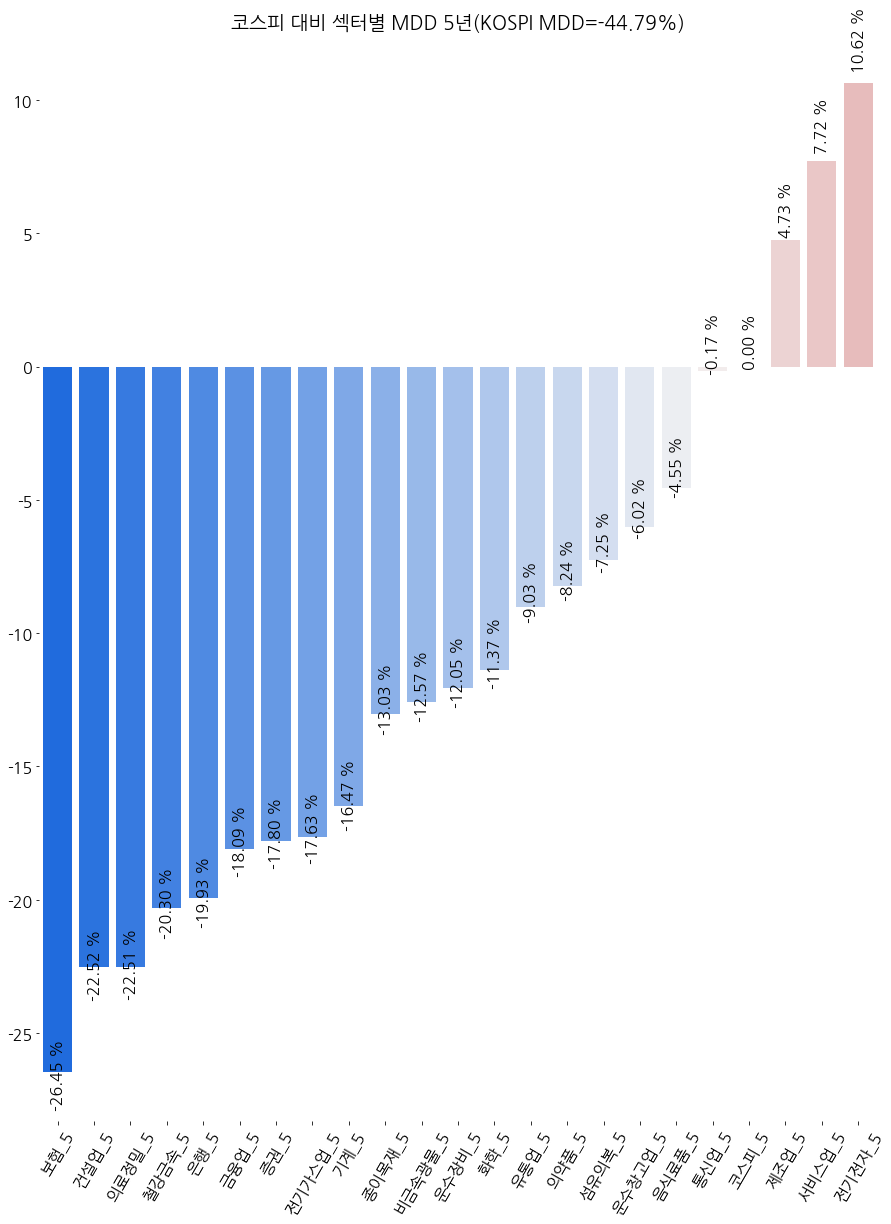

In [60]:
df_mdd_5_modified = df_mdd_5_modified.sort_values(by=['MDD_5'])
plt.rcParams['figure.figsize'] = (15, 20) 
_ = plt.xticks(rotation=60)
palette = sns.diverging_palette(250, 15, s=200, l=40,
                                  n=36, center="light")
ax = sns.barplot(data = df_mdd_5_modified.T, palette = palette)
plt.title("코스피 대비 섹터별 MDD 5년(KOSPI MDD=-44.79%)")
plt.sca(ax)
plt.box(False)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f %%"%(height), (left+width/2, height*1.05), ha='center',rotation=90)
    plt.rcParams['font.family'] = 'NanumGothic'

In [61]:
sec_200 = [커뮤니케이션서비스200,건설200,중공업200,철강소재200,에너지화학200,정보기술200,금융200,생활소비재200,경기소비재200,산업재200,헬스케어200]
sec_200_name = ['코스피 200 커뮤니케이션서비스', '코스피 200 건설', '코스피 200 중공업', '코스피 200 철강/소재',
       '코스피 200 에너지/화학', '코스피 200 정보기술', '코스피 200 금융', '코스피 200 생활소비재',
       '코스피 200 경기소비재', '코스피 200 산업재', '코스피 200 헬스케어']


In [62]:
sec_200_dict={}

In [63]:
for idx, name in enumerate(sec_200):
    sec_200_dict[sec_200_name[idx]] = round(get_mdd_200(name),3)
sec_200_dict['코스피 200'] = round(get_mdd_200(df_kospi_200),3)

Int64Index([2396], dtype='int64')
Int64Index([6024], dtype='int64')
Int64Index([9653], dtype='int64')
Int64Index([13282], dtype='int64')
Int64Index([16908], dtype='int64')
Int64Index([20536], dtype='int64')
Int64Index([24165], dtype='int64')
Int64Index([27794], dtype='int64')
Int64Index([31422], dtype='int64')
Int64Index([34426], dtype='int64')
Int64Index([37276], dtype='int64')
Int64Index([348], dtype='int64')


In [64]:
df_mdd_200 = pd.DataFrame(data = sec_200_dict.values(), index = sec_200_dict.keys(), columns = ['MDD_200'])

In [65]:
df_mdd_200_modified = df_mdd_200 + 36.18
df_mdd_200_modified = df_mdd_200_modified.sort_values(by=['MDD_200'])

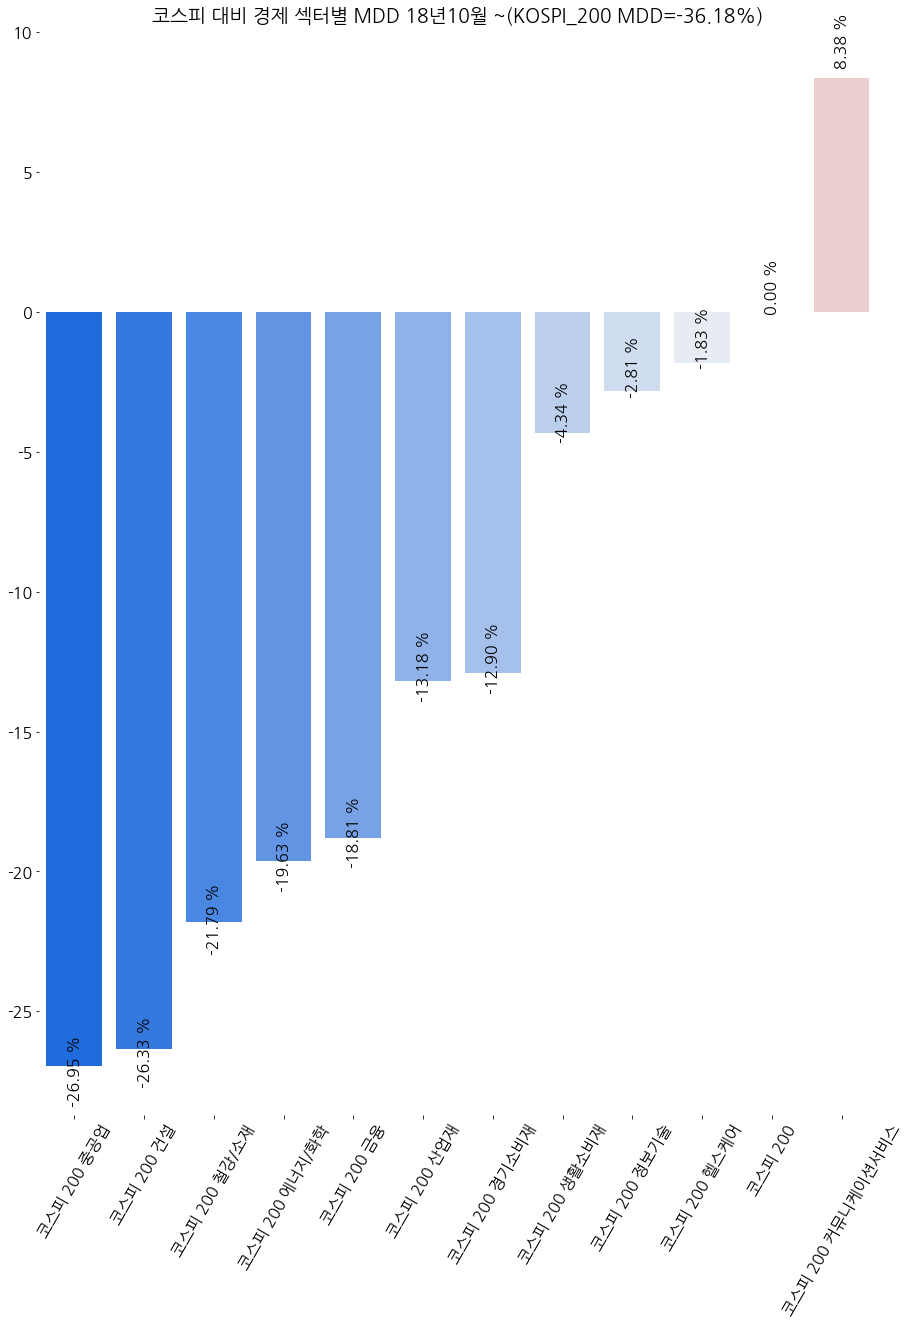

In [66]:
df_mdd_200_modified = df_mdd_200_modified.sort_values(by=['MDD_200'])
plt.rcParams['figure.figsize'] = (15, 20) 
_ = plt.xticks(rotation=60)
palette = sns.diverging_palette(250, 15, s=200, l=40,
                                  n=20, center="light")
ax = sns.barplot(data = df_mdd_200_modified.T, palette = palette)
plt.title("코스피 대비 경제 섹터별 MDD 18년10월 ~(KOSPI_200 MDD=-36.18%)")
plt.sca(ax)
plt.box(False)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f %%"%(height), (left+width/2, height*1.05), ha='center',rotation=90)
    plt.rcParams['font.family'] = 'NanumGothic'

In [67]:
df_mdd_10_modified = df_mdd_10 + 44.79

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

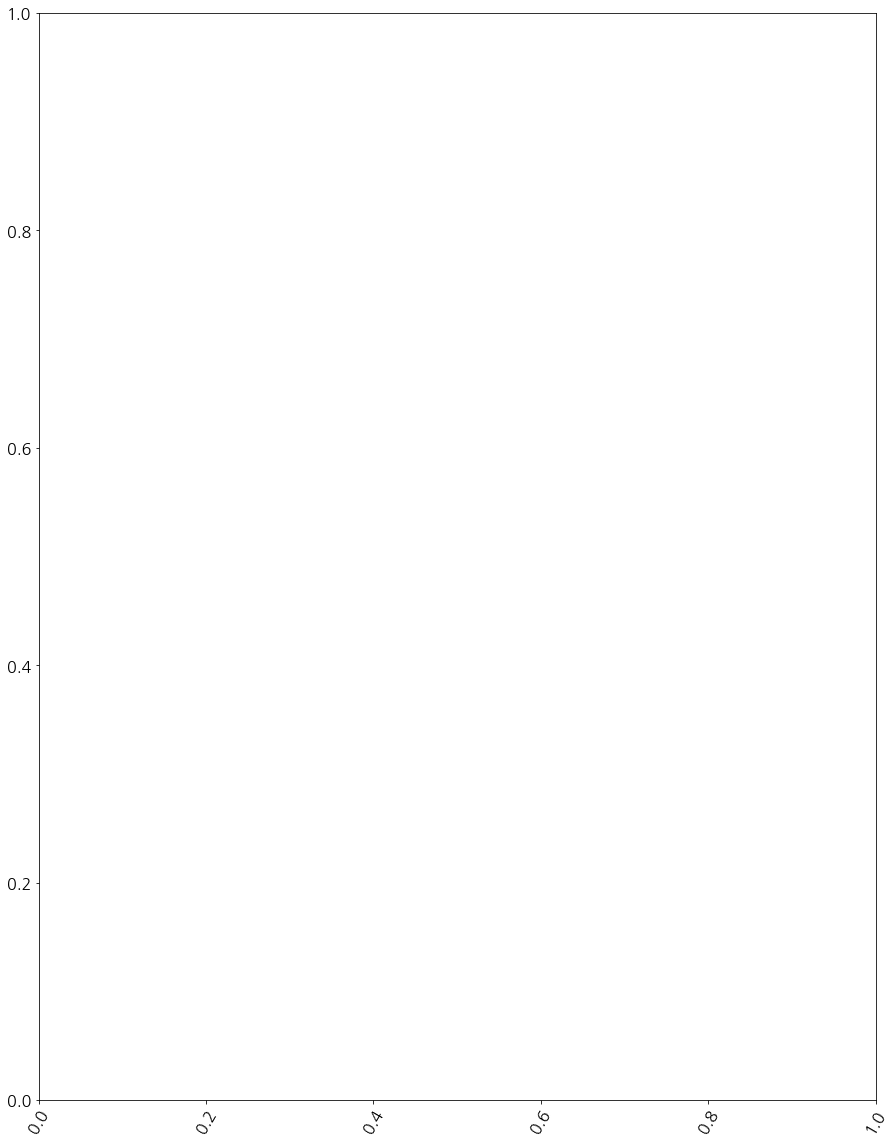

In [68]:
df_mdd_10_modified = df_mdd_10_modified.sort_values(by=['MDD_10'])
_ = plt.xticks(rotation=60)
palette = sns.diverging_palette(250, 15, s=200, l=40,
                                  n=33, center="light")
ax = sns.barplot(df_mdd_10_modified.T, palette = palette)
plt.title("코스피 대비 섹터별 MDD 10년(KOSPI MDD=-44.79%)")
plt.sca(ax)
plt.box(False)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f %%"%(height), (left+width/2, height*1.01), ha='center',rotation=90)
    plt.rcParams['font.family'] = 'NanumGothic'